## Credit Card Fraud Prediction

**Build a machine learning model to identify fraudulent credit card
transactions.**
Preprocess and normalize the transaction data, handle class
imbalance issues, and split the dataset into training and testing sets.
Train a classification algorithm, such as logistic regression or random
forests, to classify transactions as fraudulent or genuine.
Evaluate the model's performance using metrics like precision, recall,
and F1-score, and consider techniques like oversampling or
undersampling for improving results.
- **UnderSampling**: Best results are from **Random Forest**
- **OverSampling**(using SMOTE): Best results are from **KNN**

**NAME: Ankush Talukdar**

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Understanding the Dataset

- ### **Loading File**

In [2]:
data=pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- ### Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [23]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

- ### Data Visualization

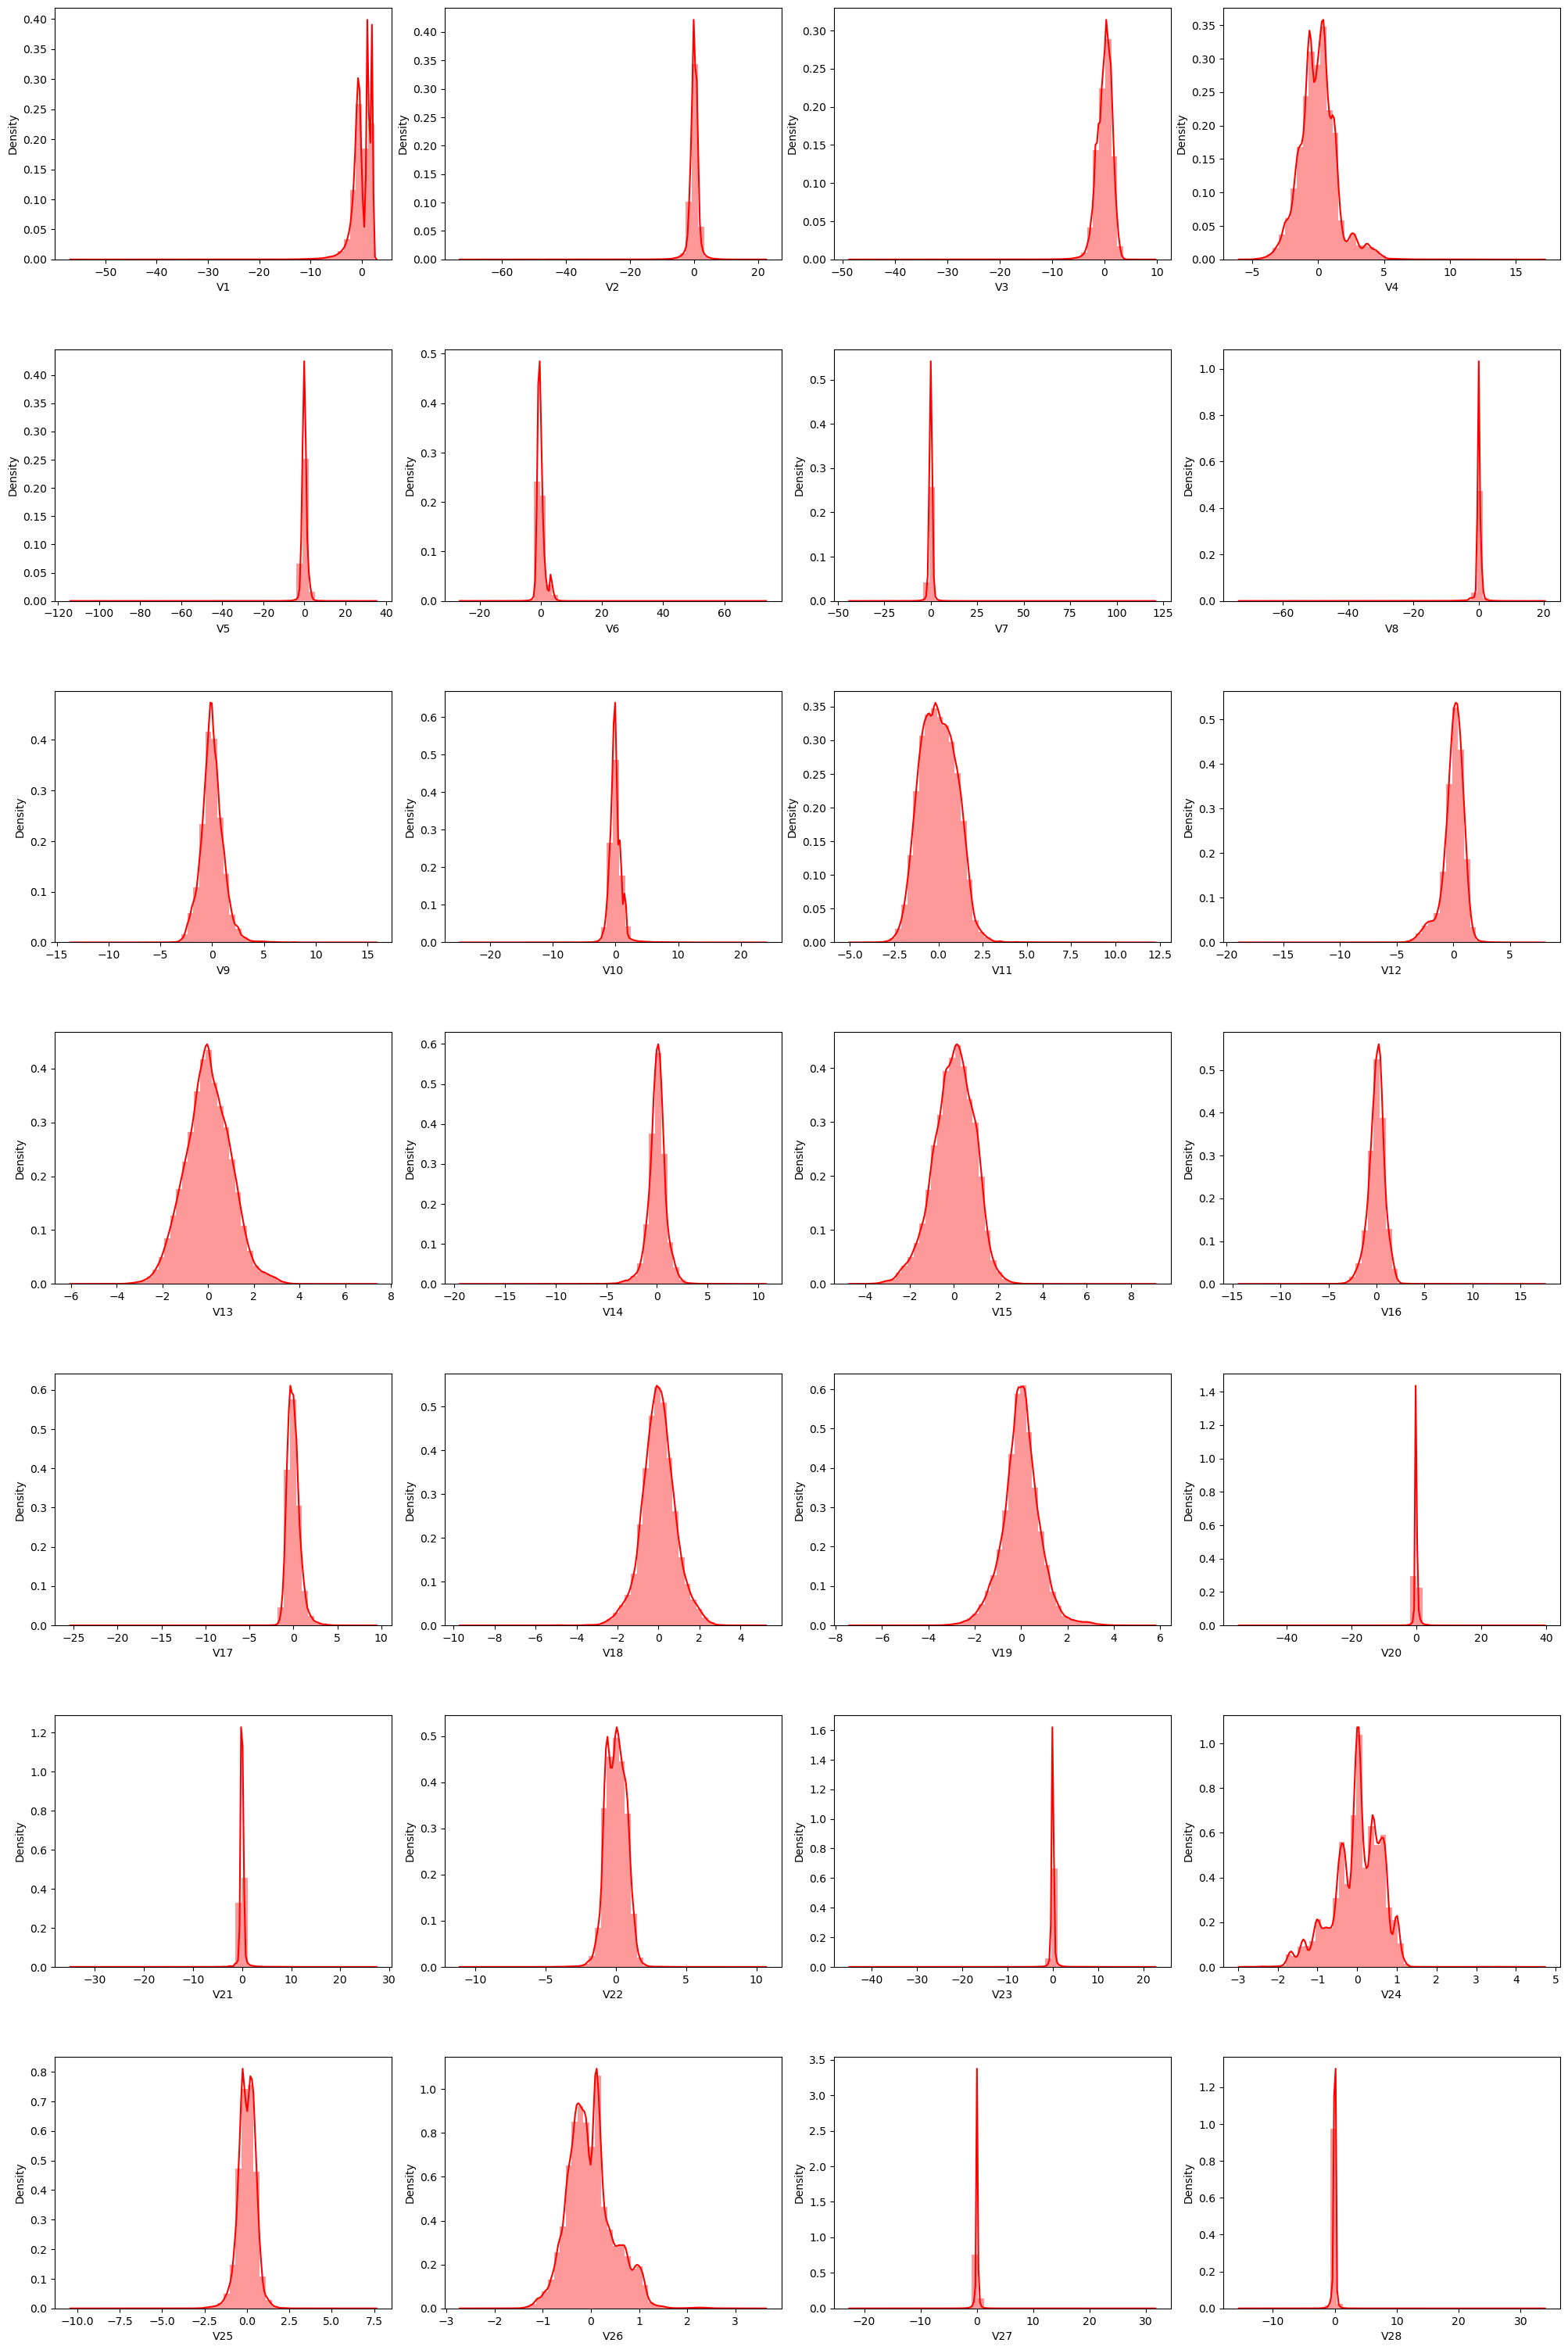

In [297]:
d_temp = data.drop(columns=['Time', 'Amount', 'Class'], axis=1)

fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 30))
index = 0
ax = ax.flatten()

for col in d_temp.columns:
    sns.distplot(d_temp[col], ax=ax[index],color='Red')
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

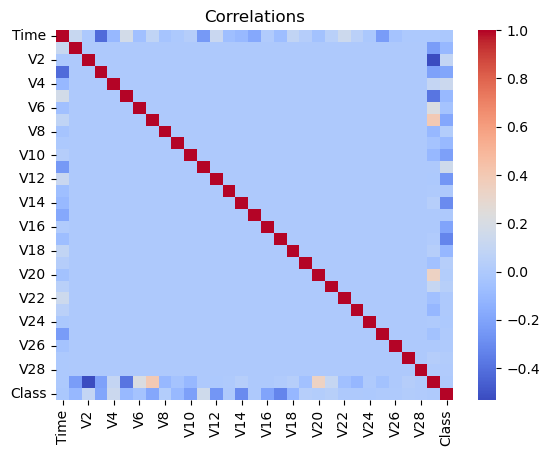

In [298]:
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlations')
plt.show()

In [12]:
fraud=pd.DataFrame(data[data['Class']==1])
fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [13]:
valid=pd.DataFrame(data[data['Class']==0])
valid

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


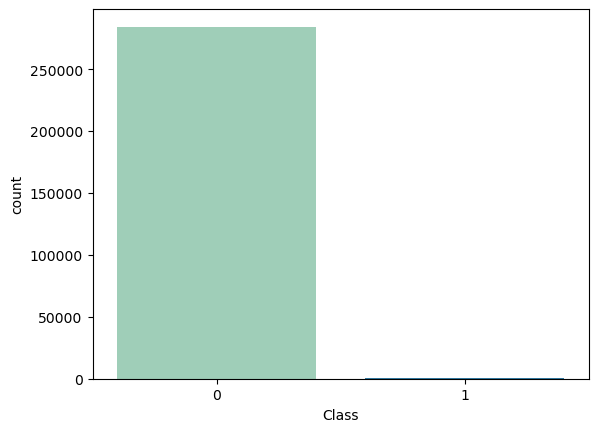

In [33]:
sns.countplot(x='Class',data=data,palette = "YlGnBu")
plt.show()

In [35]:
valid.shape

(284315, 31)

In [36]:
fraud.shape

(492, 31)

## Data Modelling

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import roc_curve,RocCurveDisplay,auc

### Undersampling

- **Balancing 'Class'**

In [39]:
valid_sm = valid.sample(n=492)

In [40]:
join=pd.concat([valid_sm,fraud],axis=0)

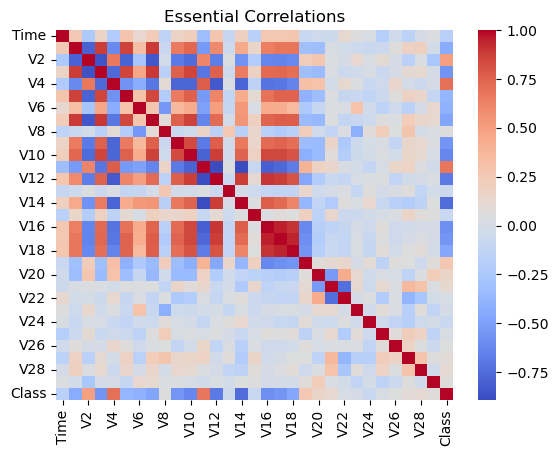

In [304]:
plt.title("Essential Correlations")
sns.heatmap(join.corr(), cmap='coolwarm')
plt.show()

In [55]:
join['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

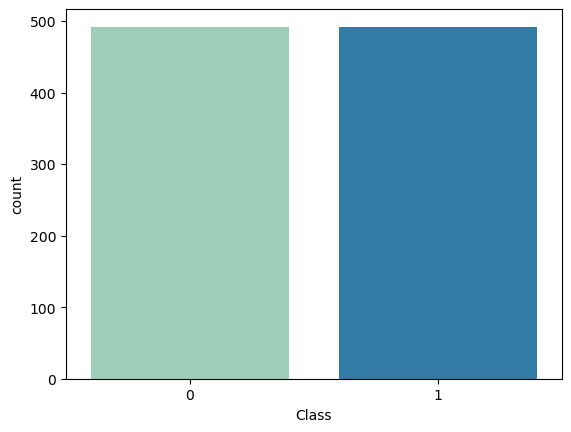

In [269]:
sns.countplot(x='Class',data=join,palette = "YlGnBu")
plt.show()

In [62]:
x=join.iloc[:,:30]
x.shape

(984, 30)

In [66]:
y=join.loc[:,'Class']
y.shape

(984,)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

- **Model Evaluations**

In [268]:
def matrix(a,b):
    cm1 = confusion_matrix(a,b)
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm1.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm1/np.sum(cm1), annot = labels, fmt=  '', cmap = 'Reds')
    plt.show()

def curve(a,b):
    fpr,tpr,_=roc_curve( a,b)
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot(color='orange')
    plt.title('ROC',color='red')
    plt.show()
    
def report(a,b):
    print(classification_report(a,b))

- ### Undersampling Logistic Regression

In [84]:
#Test LOGISIC REGRESSION
logreg= LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
logreg.fit(x_train,y_train)
pred_lr = logreg.predict(x_test)
acc_lr = accuracy_score(pred_lr, y_test)
print(round(acc_lr*100,2))

91.88


<Axes: >

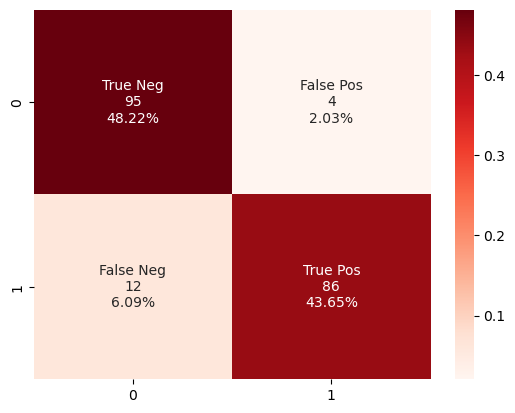

In [267]:
cm1 = confusion_matrix(y_test, pred_lr)
names = ['True Neg','False Pos','False Neg','True Pos']
counts = [value for value in cm1.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm1/np.sum(cm1), annot = labels, fmt=  '', cmap = 'Reds')

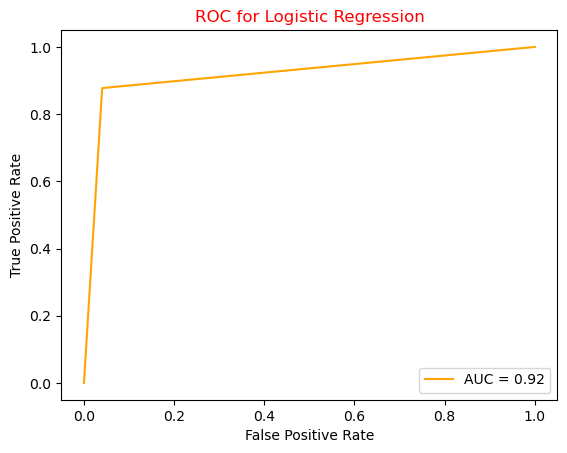

In [266]:
fpr,tpr,_=roc_curve( y_test,pred_lr)
roc_auc = auc(fpr, tpr)
RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc).plot(color='orange')
plt.title('ROC for Logistic Regression',color='red')
plt.show()

In [134]:
print('*'*20,'Logistic Regression','*'*20,'\n')
print(classification_report(y_test,pred_lr))

******************** Logistic Regression ******************** 

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



- ### Undersampling Support Vector Classifier

In [153]:
svc = SVC(kernel = 'linear',C = 0.5)
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
acc_svc = accuracy_score(pred_svc, y_test)
print(round(acc_svc*100,2))

91.88


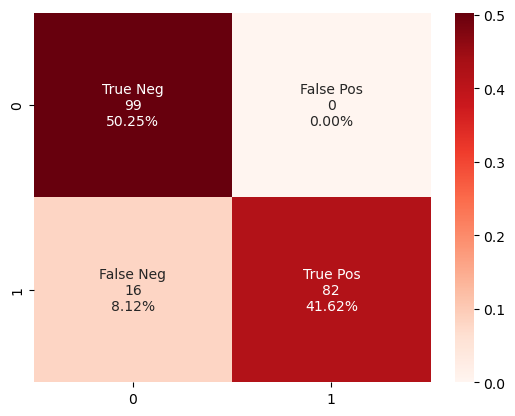

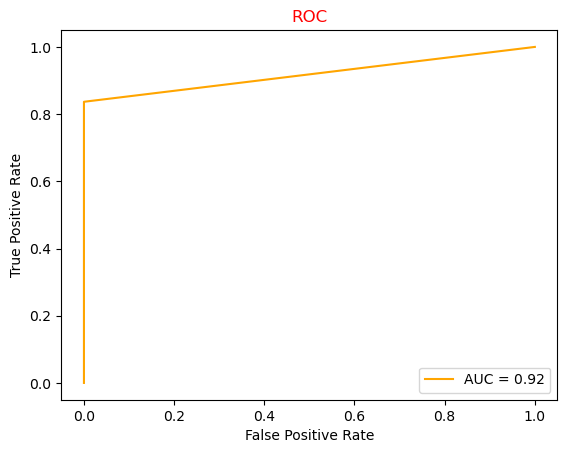

******************** Support Vector Classifier ******************** 

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        99
           1       1.00      0.84      0.91        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [254]:
matrix(y_test,pred_svc)
curve(y_test,pred_svc)
print('*'*20,'Support Vector Classifier','*'*20,'\n')
report(y_test,pred_svc)

- ### Undersampling Decision Tree

In [151]:
dtc=DecisionTreeClassifier(random_state = 1000,max_depth = 12,min_samples_leaf = 1)
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
acc_dtc = accuracy_score(pred_dtc, y_test)
print(round(acc_dtc*100,2))

91.37


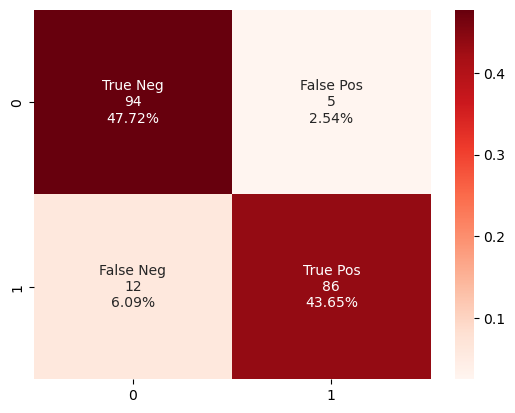

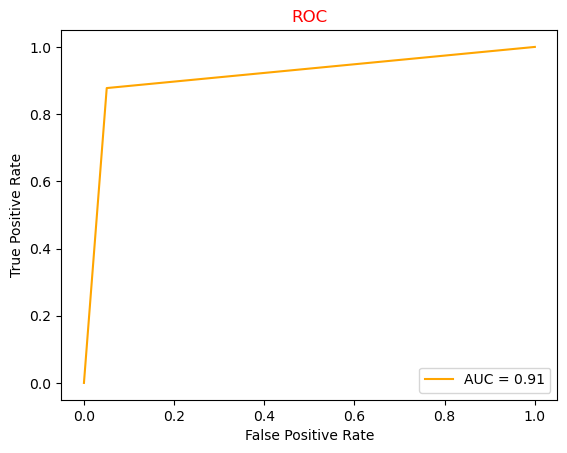

******************** Decision Tree Classifier  ******************** 

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



In [255]:
matrix(y_test,pred_dtc)
curve(y_test,pred_dtc)
print('*'*20,'Decision Tree Classifier ','*'*20,'\n')
report(y_test,pred_dtc)

- ### Undersampling Random Forest

In [163]:
rf=RandomForestClassifier(max_depth =4,random_state = 0)
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
acc_rf = accuracy_score(pred_rf, y_test)
print(round(acc_rf*100,2))

92.89


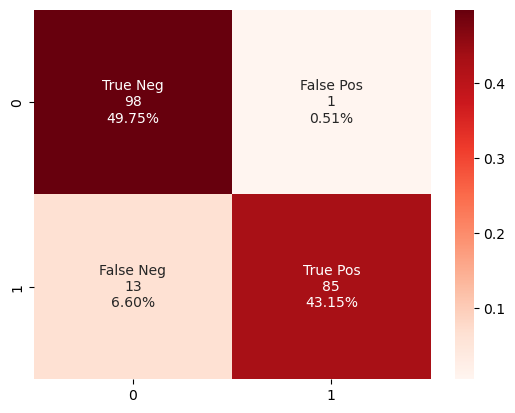

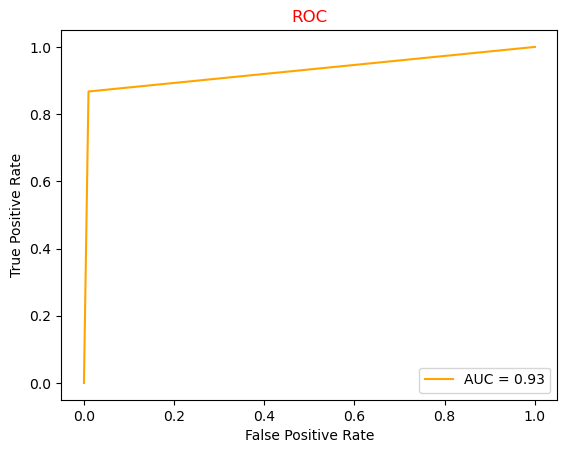

******************** Random Forest Classifier  ******************** 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        99
           1       0.99      0.87      0.92        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [256]:
matrix(y_test,pred_rf)
curve(y_test,pred_rf)
print('*'*20,'Random Forest Classifier ','*'*20,'\n')
report(y_test,pred_rf)

- ### Undersampling using KNN

In [176]:
knn = KNeighborsClassifier(leaf_size = 1, n_neighbors =3,p = 1)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
acc_knn = accuracy_score(pred_knn, y_test)
print(round(acc_knn*100,2))

68.53


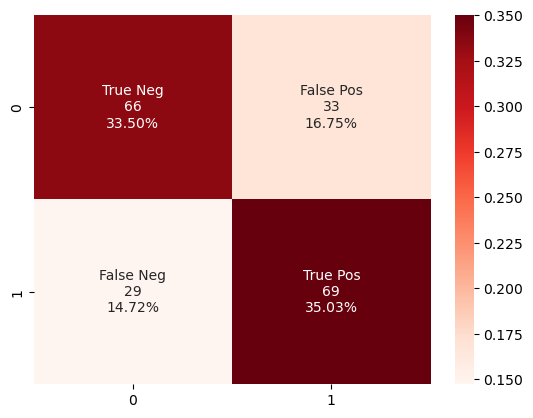

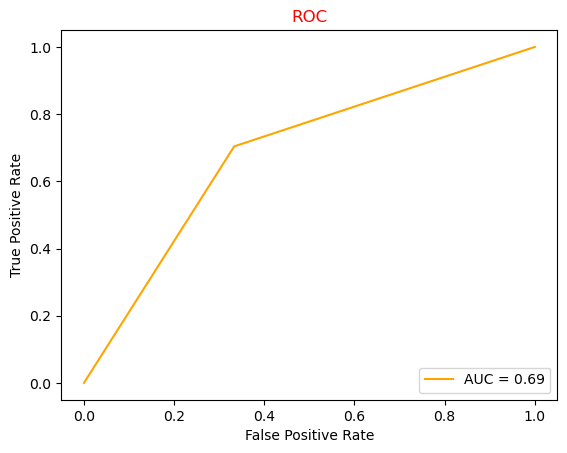

******************** K-Nearest Neighbors ******************** 

              precision    recall  f1-score   support

           0       0.69      0.67      0.68        99
           1       0.68      0.70      0.69        98

    accuracy                           0.69       197
   macro avg       0.69      0.69      0.69       197
weighted avg       0.69      0.69      0.69       197



In [257]:
matrix(y_test,pred_knn)
curve(y_test,pred_knn)
print('*'*20,'K-Nearest Neighbors','*'*20,'\n')
report(y_test,pred_knn)

# 

##

## Oversampling
- Increase the minority samples of the target variable to the majority samples.
- For best performances, we will use the combination of undersampling and oversampling.
- Using SMOTE for Unbalance dataset

In [202]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [186]:
data.shape

(284807, 31)

In [206]:
df1 = data[['V3','V4','V7','V10','V11','V12','V14','V16','V17','Class']].copy(deep = True)
df1.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


- **SMOTE**

In [209]:
# OverSampling
os = SMOTE(sampling_strategy = 0.5)
us = RandomUnderSampler(sampling_strategy = 0.1)
a = df1.iloc[:,:9].values
b = df1.iloc[:,9].values

steps = [('under', us),('over', os)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(a,b)
Counter(t1)

Counter({0: 4920, 1: 2460})

In [222]:
# Preparing new train and test set

x_train2, x_test2, y_train2, y_test2 = train_test_split(f1,t1, test_size = 0.20, random_state = 2)

- ### Oversampling using Logistic Regression

In [231]:
#Test LOGISIC REGRESSION
logreg1= LogisticRegression(random_state = 0,C=10,penalty= 'l2')
logreg1.fit(x_train2,y_train2)
pred_lr1 = logreg1.predict(x_test2)
acc_lr1 = accuracy_score(pred_lr1, y_test2)
print(round(acc_lr1*100,2))

95.33


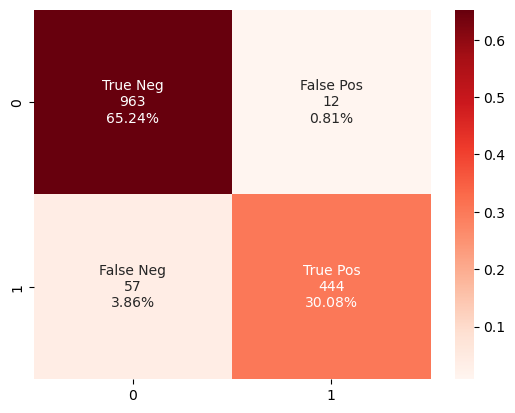

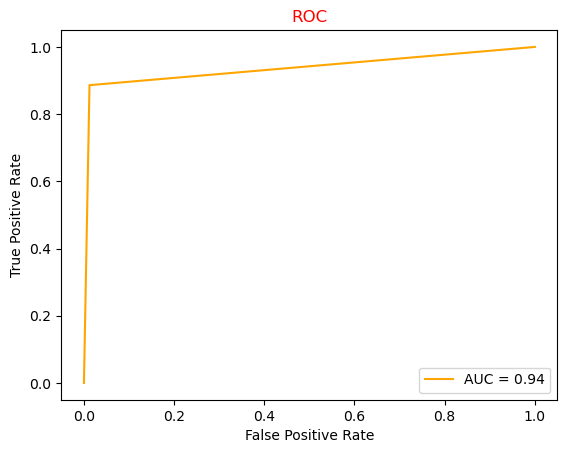

******************** LOGISIC REGRESSION  ******************** 

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       975
           1       0.97      0.89      0.93       501

    accuracy                           0.95      1476
   macro avg       0.96      0.94      0.95      1476
weighted avg       0.95      0.95      0.95      1476



In [393]:
matrix(y_test2,pred_lr1)
curve(y_test2,pred_lr1)
print('*'*20,'LOGISIC REGRESSION ','*'*20,'\n')
report(y_test2,pred_lr1)

- ### Oversampling using Support Vector Classifier

In [234]:
# Support Vector Classifier
svc1 = SVC(kernel = 'linear',C = 0.5)
svc1.fit(x_train2,y_train2)
pred_svc1=svc1.predict(x_test2)
acc_svc1 = accuracy_score(pred_svc1, y_test2)
print(round(acc_svc1*100,2))

94.85


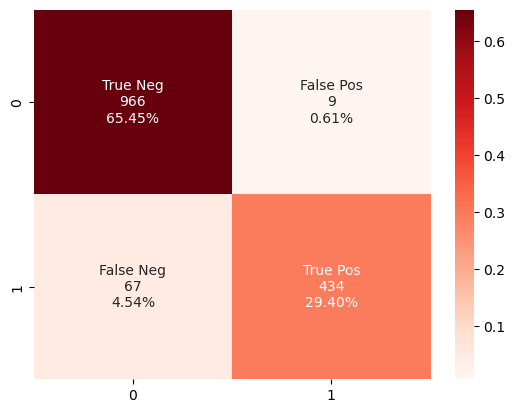

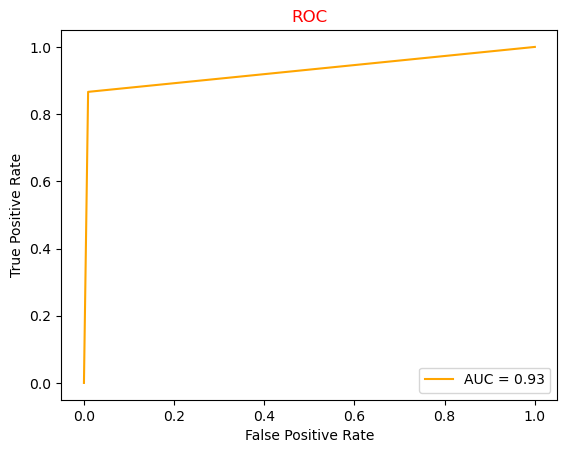

******************** Support Vector Classifier ******************** 

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       975
           1       0.98      0.87      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



In [394]:
matrix(y_test2,pred_svc1)
curve(y_test2,pred_svc1)
print('*'*20,'Support Vector Classifier','*'*20,'\n')
report(y_test2,pred_svc1)

- ### Oversampling using KNN

In [236]:
knn1 = KNeighborsClassifier(leaf_size = 1, n_neighbors =3,p = 1)
knn1.fit(x_train2,y_train2)
pred_knn1=knn1.predict(x_test2)
acc_knn1 = accuracy_score(pred_knn1, y_test2)
print(round(acc_knn1*100,2))

98.1


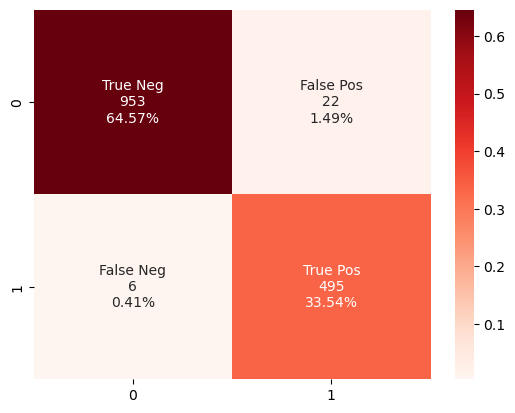

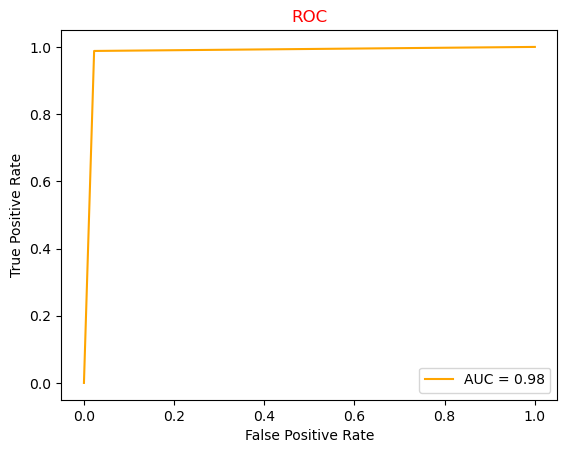

******************** K-Nearest Neighbors ******************** 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       975
           1       0.96      0.99      0.97       501

    accuracy                           0.98      1476
   macro avg       0.98      0.98      0.98      1476
weighted avg       0.98      0.98      0.98      1476



In [395]:
matrix(y_test2,pred_knn1)
curve(y_test2,pred_knn1)
print('*'*20,'K-Nearest Neighbors','*'*20,'\n')
report(y_test2,pred_knn1)

- ### Oversampling using Random Forest

In [237]:
rf1=RandomForestClassifier(max_depth =4,random_state = 0)
rf1.fit(x_train2,y_train2)
pred_rf1=rf1.predict(x_test2)
acc_rf1 = accuracy_score(pred_rf1, y_test2)
print(round(acc_rf1*100,2))

94.85


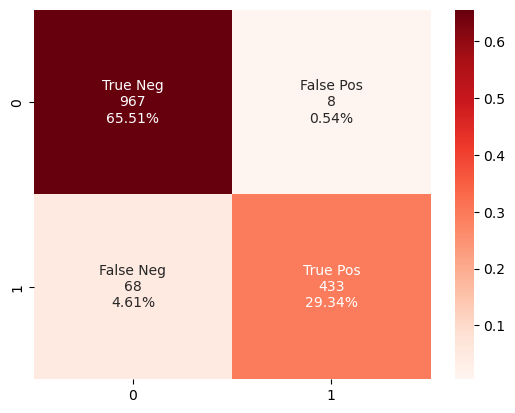

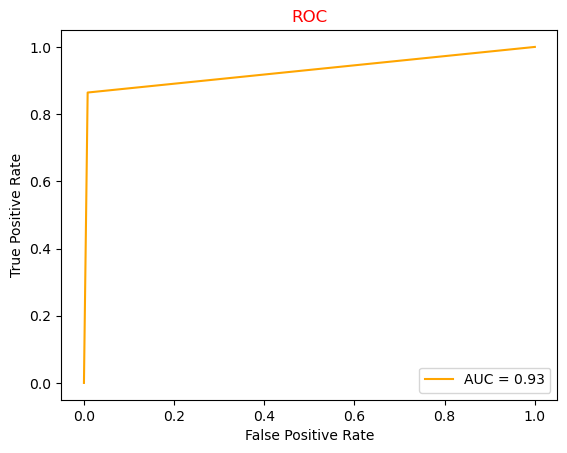

******************** Random Forest Classifier  ******************** 

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       975
           1       0.98      0.86      0.92       501

    accuracy                           0.95      1476
   macro avg       0.96      0.93      0.94      1476
weighted avg       0.95      0.95      0.95      1476



In [396]:
matrix(y_test2,pred_rf1)
curve(y_test2,pred_rf1)
print('*'*20,'Random Forest Classifier ','*'*20,'\n')
report(y_test2,pred_rf1)

- ### Oversampling using Decision Tree

In [241]:
dtc1=DecisionTreeClassifier(random_state = 1000,max_depth = 12,min_samples_leaf = 1)
dtc1.fit(x_train2,y_train2)
pred_dtc1=dtc1.predict(x_test2)
acc_dtc1 = accuracy_score(pred_dtc1, y_test2)
print(round(acc_dtc1*100,2))

96.61


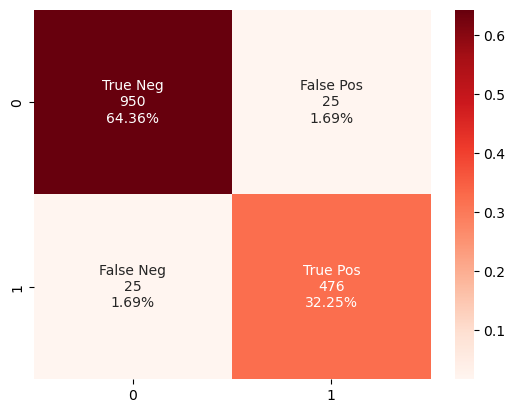

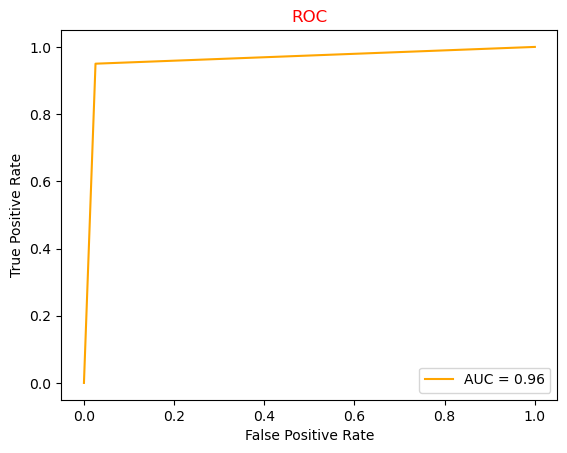

******************** Decision Tree Classifier  ******************** 

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       975
           1       0.95      0.95      0.95       501

    accuracy                           0.97      1476
   macro avg       0.96      0.96      0.96      1476
weighted avg       0.97      0.97      0.97      1476



In [397]:
matrix(y_test2,pred_dtc1)
curve(y_test2,pred_dtc1)
print('*'*20,'Decision Tree Classifier ','*'*20,'\n')
report(y_test2,pred_dtc1)

In [390]:
#UnderSammpling
pd.options.display.float_format = '{:.2f}'.format
res = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Random Forest', 'Decision Tree'], 
                        'Accuracy': [acc_lr, acc_knn, acc_svc, acc_rf,acc_dtc],
                   'ROC':[0.92,0.68,0.92,0.93,0.91],
                    'F1-Score(0)': [0.92,0.68,0.93,0.93,0.92],
                   'F1-Score(1)': [0.91,0.69,0.91,0.92,0.91]})
print ('\033[1m' +'\033[95m'+ 'Results Of UnderSampling:')
res.style.set_properties(**{'text-align': 'justify'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

Results Of UnderSampling:


,Model,Accuracy,ROC,F1-Score(0),F1-Score(1)
0,Logistic Regression,0.918782,0.920000,0.920000,0.910000
1,K-Nearest Neighbour,0.685279,0.680000,0.680000,0.690000
2,Support Vector Machine,0.918782,0.920000,0.930000,0.910000
3,Random Forest,0.928934,0.930000,0.930000,0.920000
4,Decision Tree,0.913706,0.910000,0.920000,0.910000


In [392]:

ans = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector Machine', 
                                  'Random Forest', 'Decision Tree'], '':'',
                        'Accuracy': [acc_lr1, acc_knn1, acc_svc1, acc_rf1,acc_dtc1],' ':' ',
                   'ROC':[0.93,0.98,0.93,0.93,0.96],'':'',
                    'F1-Score(0)': [0.97,0.99,0.96,0.96,0.97],'':'',
                   'F1-Score(1)': [0.93,0.97,0.92,0.92,0.95]})
print ('\033[1m' +'\033[96m'+ 'Results Of OverSampling:')
ans.style.set_properties(**{'text-align': 'justify'}).set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

Results Of OverSampling:


,Model,,Accuracy,,ROC,F1-Score(0),F1-Score(1)
0,Logistic Regression,,0.953252,,0.930000,0.970000,0.930000
1,K-Nearest Neighbour,,0.981030,,0.980000,0.990000,0.970000
2,Support Vector Machine,,0.948509,,0.930000,0.960000,0.920000
3,Random Forest,,0.948509,,0.930000,0.960000,0.920000
4,Decision Tree,,0.966125,,0.960000,0.970000,0.950000


#### After using the algorithms on this imbalanced dataset we can conclude that there are 2 scenarios to evaluate
- **UnderSampling**: Best results are from **Random Forest**
- **OverSampling**(using SMOTE): Best results are from **KNN**